In [4]:
using PyPlot,JLD2

Using $\sqrt{e} \cos{\omega}$ and $\sqrt{e} \sin{\omega}$ as priors, doesnt work properly. don't know why. Reverted to previous prior $e \cos{\omega}$ and $e \sin{\omega}$

In [187]:
calc_deg(value) = value * 180/pi
calc_rad(value) = value * pi/180
function extract_data(filename)
	f = jldopen(String(filename), "r")
	return f["pbest_global"]
end
function evec(ecc,om)
    omega = calc_rad(om)
    ecosw = ecc*cos(omega)
    esinw = ecc*sin(omega)
    return ecosw,esinw
end

evec (generic function with 1 method)

## Posterior Distributions

In [2]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")

plot_likelihood (generic function with 2 methods)

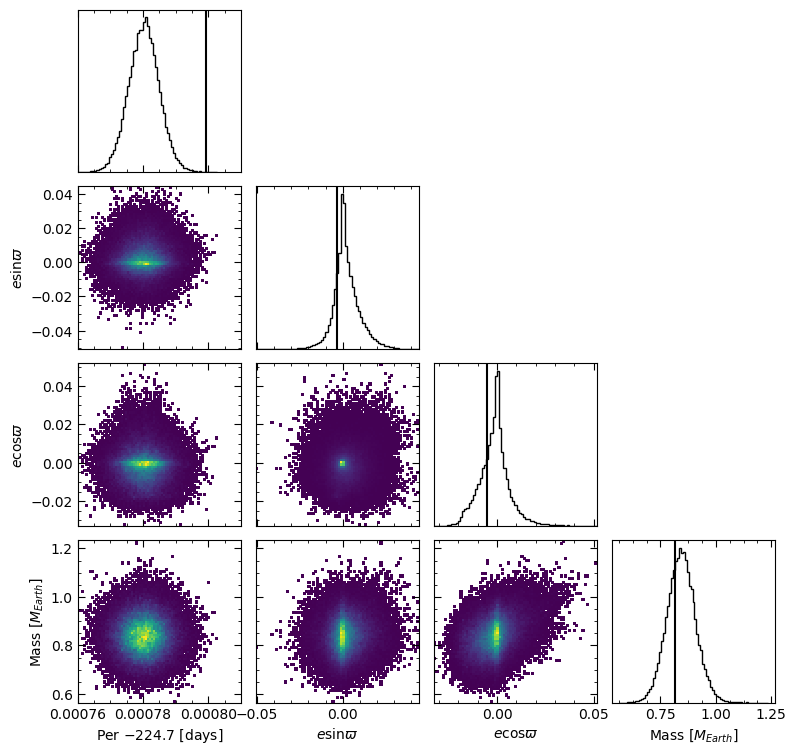

P_mean= 0.0007802886356179472
-0.004975858997178902 <- ecosω & esinω -> -0.003352734293109698


In [243]:
include("corner_plot.jl")
corner_planet(p_mc33,75,"venus")

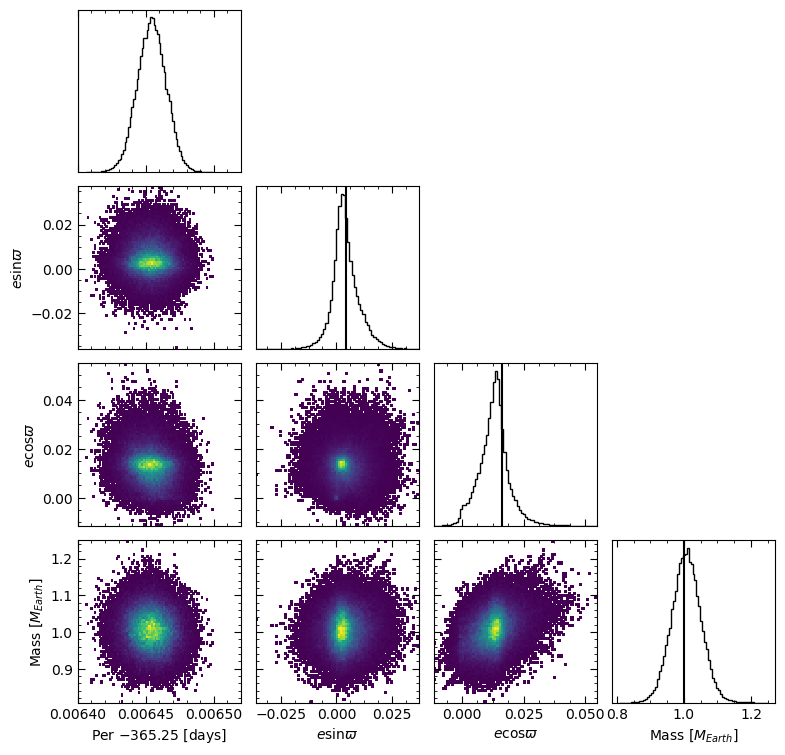

P_mean= 0.006454152379397188
0.016107124052845066 <- ecosω & esinω -> 0.004410278307120753


In [244]:
corner_planet(p_mc33,75,"earth")

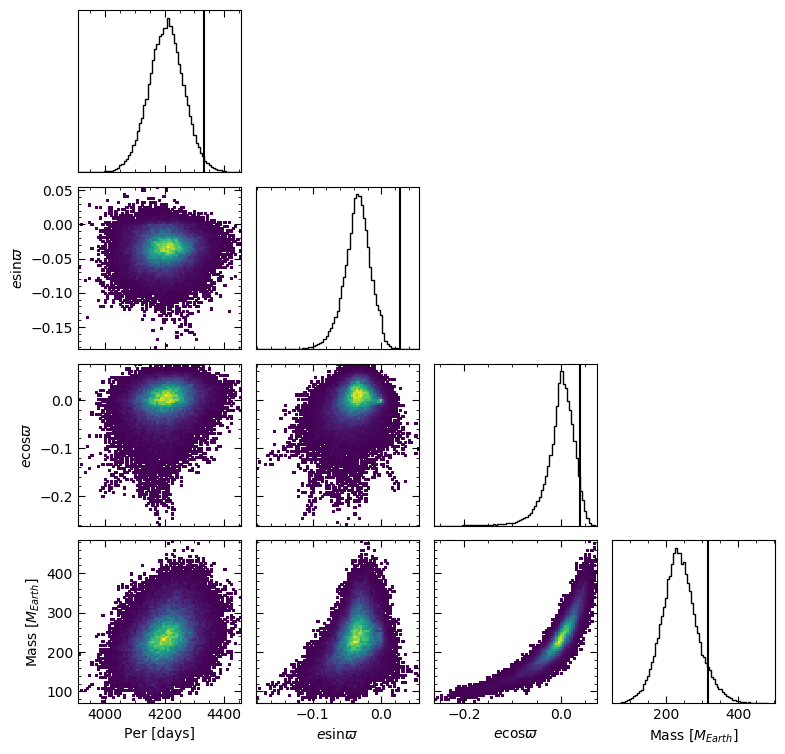

P_mean= 4204.298420096252
0.04010139295881334 <- ecosω & esinω -> 0.026379504975697257


In [245]:
corner_planet(p_mc33,75,"jupiter")

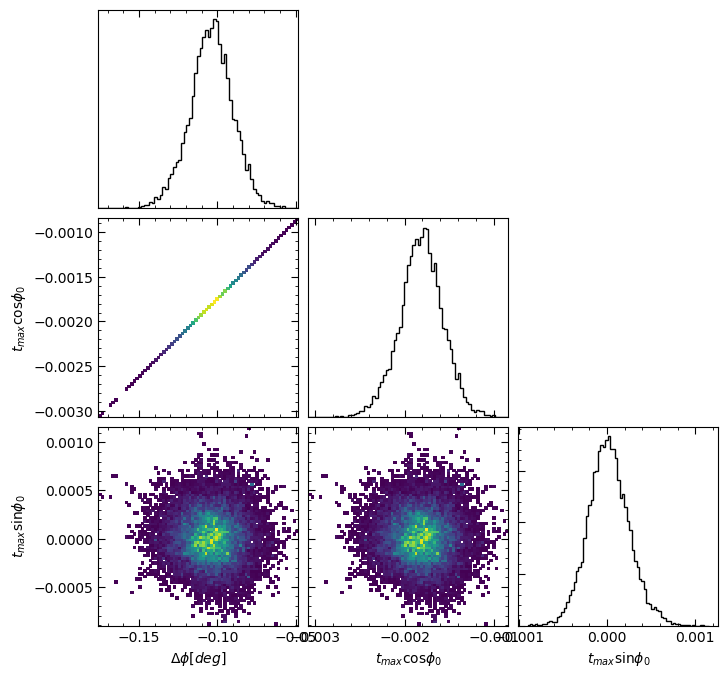

In [246]:
corner_moon(m_mc33,75)

Using original prior on eccentricity.

In [108]:
tt,tt0,sigtt,ttmodel = g["tt"],g["tt0"],g["sigtt"],g["ttmodel"]
pbest_global = g["pbest_global"]
nplanet,ntrans = g["nplanet"],g["ntrans"]
pair_ttvs = decompose_ttvs(nplanet,ntrans,pbest_global) .* (24 * 60)
n1,n2,n3 = ntrans
mu1,P1,t01,ecosw1,esinw1 = pbest_global[1:5]
mu2,P2,t02,ecosw2,esinw2 = pbest_global[6:10]
mu3,P3,t03,ecosw3,esinw3 = pbest_global[11:15]
time1 = collect(t01 .+ range(0,stop=n1-1,length=n1) .* P1)
time2 = collect(t02 .+ range(0,stop=n2-1,length=n2) .* P2)
tt1 = tt[1:n1]
tt2 = tt[n1+1:n1+n2];

In [194]:
calc_rad(value) = value * pi/180
calc_deg(value) = value * 180/pi
calc_omega(pomega,Omega) = pomega - Omega
function calc_L(t,t0,P,esinw)
    lambda = (360/P .* (t.-t0)) .+ 2*esinw
    return lambda
end

calc_L (generic function with 1 method)

In [197]:
(J2000-t01)/P1 , (J2000-t02)/P2 , (J2000-t03)/P3

(80.29002775086454, 49.06304030994849, 1.8868486203603383)

In [195]:
calc_rad(80.29002775086454)

1.4013253407702035

$L \equiv \lambda$. Check to see if $\lambda_{E} \sim \lambda_{V}$ at their respective transit times. $\lambda mod 2 \pi = \lambda_{obs}$[what?] where $\lambda_{obs}$ is longitude that both Earth and Venus have.
true $\lambda$ from planet body data sheet: 181.9, 100, 34 degrees

In [117]:
J2000 = 2451545.0

w1 = calc_deg(atan(esinw1,ecosw1))
w2 = calc_deg(atan(esinw2,ecosw2))
w3 = calc_deg(atan(esinw3,ecosw3))
w1,w2,w3


(-2.9189684831965503, 9.176444742981595, -49.05234032359363)

In [174]:
L_1 = calc_L(tt1,t01,P1,esinw1)
L_2 = calc_L(tt2,t02,P2,esinw2)
# L_3 = calc_L(tt1,t03,P3,esinw3)
L_1,L_2

([-0.0024015066329488737, 359.9985750809026, 720.002237747706, 1079.9988220219257, 1439.9975087045038, 1800.0023024714983, 2160.003065197765, 2520.001219974129, 2879.99523518333, 3239.9960618528166  …  20159.996734479737, 20520.00259574987, 20880.004040825617, 21240.001734749592, 21599.99690140452, 21959.996235769864, 22320.003691815633, 22680.00261636066, 23039.998502659375, 23399.99704485963], [0.007723420943177829, 360.00448338910394, 720.0080964117075, 1080.0025614570113, 1440.0057495061735, 1800.0082994721358, 2160.0012984270165, 2520.0033907012057, 2880.0039854453016, 3240.001757352988  …  11160.001174038334, 11520.005288894095, 11880.00215863628, 12240.007783503548, 12600.006956778676, 12960.00540622818, 13320.008568061554, 13680.003907554395, 14040.00452694739, 14400.008357562872])

In [152]:
28904.409642330258-28722.430890811236

181.9787515190219

In [153]:
17662.6994287092-17562.229939921457

100.46948878774128

In [154]:
679.195296805864-644.8690628197218

34.326233986142256

Venus transit occurs 0.277 radians after it goes through periastron. Earth transit occurs -0.552 radians after it goes through periastron

In [115]:
L_1+w1,L_2+w2,L_3+w3

(-2.9193164641747487, 9.181361870724214, -728.3880501771732)

In [193]:
Dw1 = (((360/P1) .* (t01.- J2000)) .+ 181.97909950) + 360*80

77.56910918876383

In [192]:
Dw2 = ((360/P2) .* (t02 .- J2000) .+ 100.46457166) + 360*49.06304030994849

100.46457165999891

In [191]:
Dw3 = [(360/P3) .* (t03 .- J2000) .+ 34.39644051,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*1,(360/P3) .* (t03 .- J2000) .+ 34.39644051 + 360*2]

3-element Array{Float64,1}:
 -644.8690628197218 
 -284.86906281972176
   75.13093718027824

## Likelihoods And Probabilities

In [6]:
# f = jldopen("FITS/p3_fit30.0s40.0yrs.jld2","r")
m33 = jldopen("FITS/moon_fit30.0s30.0yrs.jld2","r")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/moon_fit30.0s30.0yrs.jld2 (read-only)
 ├─🔢 p3
 ├─🔢 lprob_p3
 ├─🔢 best_p3
 ├─🔢 lprob_best_p3
 ├─🔢 deltaphi
 ├─🔢 lprob_dp
 ├─🔢 best_dp
 ├─🔢 lprob_best_dp
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 dpin
 ├─🔢 dpout
 └─🔢 ndp

In [7]:
mcmc = jldopen("MCMC/p3_mcmc30.0s30.0yrs.jld2")
moon = jldopen("MCMC/moon_mcmc30.0s30.0yrs.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/MCMC/moon_mcmc30.0s30.0yrs.jld2 (read-only)
 ├─🔢 par_mcmc
 ├─🔢 lprob_mcmc
 ├─🔢 param
 ├─🔢 nwalkers
 ├─🔢 nsteps
 ├─🔢 accept
 ├─🔢 iburn
 └─🔢 indepsamples

In [9]:
# fitfile = string("FITS/moon_fit",sigma,"s",nyear,"yrs.jld2")
# f = jldopen(String(fitfile),"r")
# mcfile = string("MCMC/p3_mcmc",sigma,"s",nyear,"yrs.jld2")
# m = jldopen(String(mcfile),"r")
wide = jldopen("FITS/wide_fit30.0s30.0yrs.jld2","r")
grid_wide = (10 .^ range(log10(wide["p3in"]),stop=log10(wide["p3out"]),length=wide["np3"])) ./365.25
lprob_wide = exp.((wide["lprob_p3"] .-maximum(m33["lprob_p3"])))
pbest_global_wide = wide["best_p3"]

xgrid = (10 .^ range(log10(m33["p3in"]),stop=log10(m33["p3out"]),length=m33["np3"])) ./365.25
xprob = exp.((m33["lprob_p3"] .-maximum(m33["lprob_p3"])))

200-element Array{Float64,1}:
 0.021350116497947158
 0.02353116052124463 
 0.02589830454314109 
 0.028464013117793018
 0.031241483999954325
 0.03423985676145761 
 0.0374742780481211  
 0.04095649358434105 
 0.04469735372636965 
 0.048712195315986764
 0.05301236744910075 
 0.057610901922752804
 0.06251812798283124 
 ⋮                   
 0.015652731489433535
 0.014257621516049323
 0.012973858661991036
 0.011794236515503818
 0.010711270238555906
 0.009718544689175563
 0.008809282878741042
 0.007977609868477764
 0.007217700826426251
 0.006524145439513142
 0.005891861799647219
 0.00531611735077288 

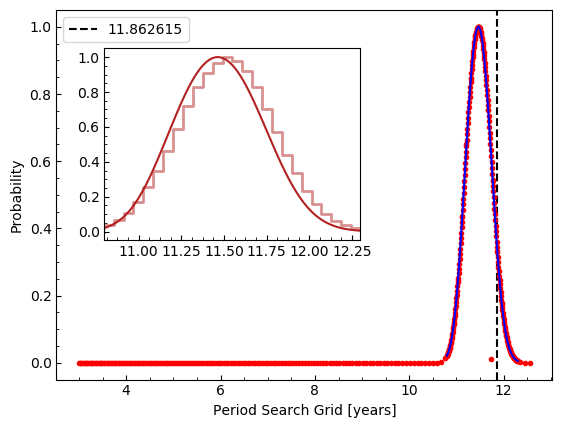

Simulated with σ= 30.0 second noise, for 30.0 observation years.


In [17]:
include("plot_likelihood.jl")
plot_likelihood(30.0,30.0,50,false)

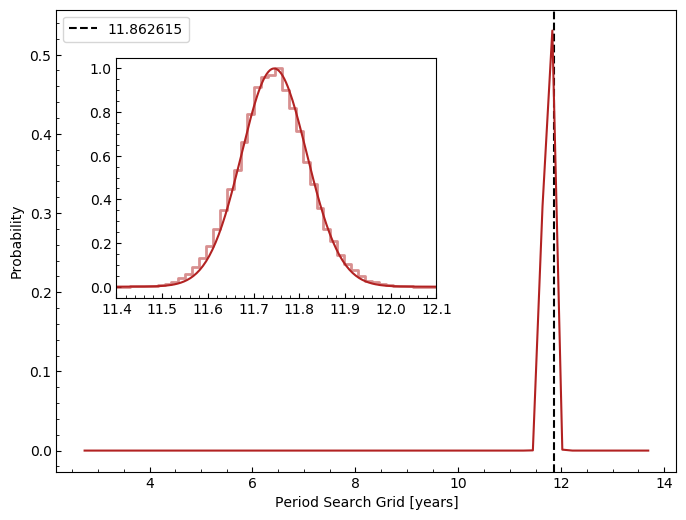

In [80]:
include("plot_likelihood.jl")
plot_likelihood(f,mcmc,false)

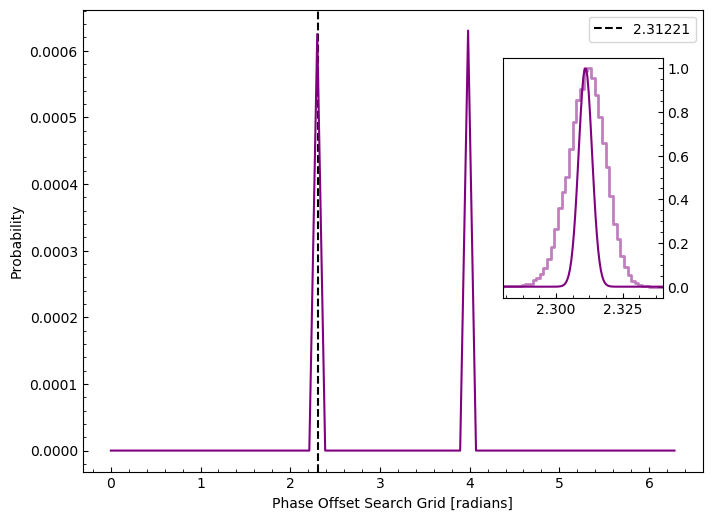

In [79]:
include("plot_likelihood.jl")
plot_likelihood(g,moon,true)

jupiter period agreement --> unique solution & not degenerate

In [44]:
using Distributions,Optim

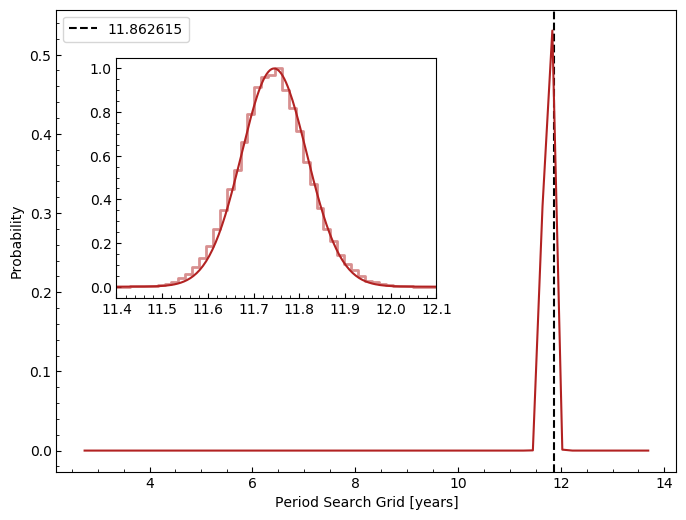

In [45]:
include("plot_likelihood.jl")
plot_likelihood(f,mcmc,false)

include("plot_orbits.jl")
plot_orbits(3,false)

In [16]:
p_33 = jldopen("FITS/p3_fit30.0s30.0yrs.jld2","r")
p_mc33 = jldopen("MCMC/p3_mcmc30.0s30.0yrs.jld2","r")
m_33 = jldopen("FITS/moon_fit30.0s30.0yrs.jld2","r")
m_mc33 = jldopen("MCMC/moon_mcmc30.0s30.0yrs.jld2","r");

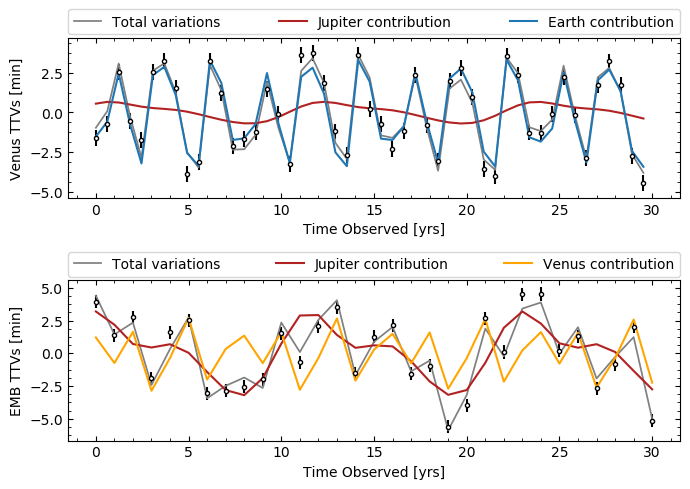

Simulated with σ= 30.0 second noise


In [17]:
include("plot_ttvs.jl")
plot_ttvs(p_33,false)
# savefig("IMAGES/EMBttvs.eps")

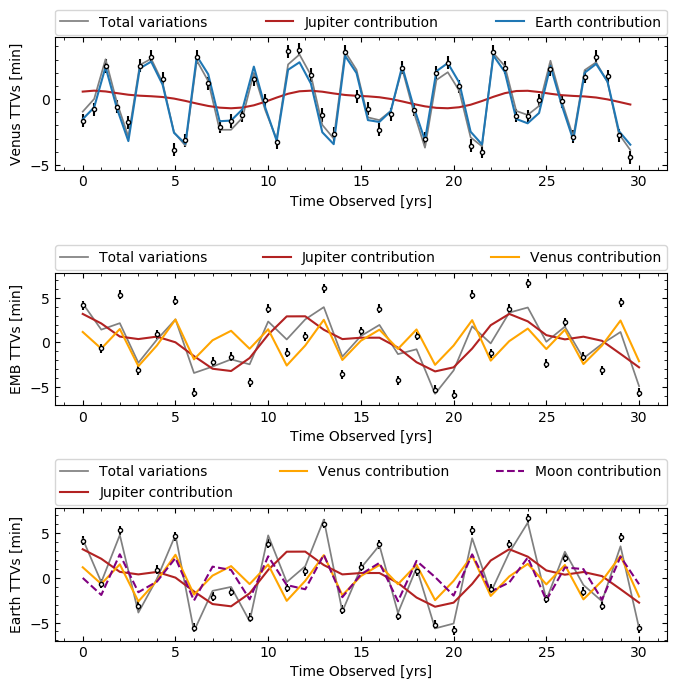

Simulated with σ= 30.0 second noise


In [248]:
include("plot_ttvs.jl")
plot_ttvs(m_33,true)

In [3]:
jldfit2=jldopen("FITS/moon_fit30.0s20.0yrs.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/moon_fit30.0s20.0yrs.jld2 (read-only)
 ├─🔢 pbest_p3
 ├─🔢 pbest_dp
 ├─🔢 lprob_p3
 ├─🔢 lprob_dp
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 dpin
 ├─🔢 dpout
 └─🔢 ndp

In [7]:
jldfit2["sigtt"]

54-element Array{Float64,1}:
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 ⋮                     
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224
 0.00034722222222222224

In [8]:
    tt,tt0,sigtt,ttmodel = jldfit2["tt"],jldfit2["tt0"],jldfit2["sigtt"],jldfit2["ttmodel"]


([2.433503767546006e6, 2.4337284689269727e6, 2.4339531719845063e6, 2.434177870623928e6, 2.4344025705756075e6, 2.4346272743391385e6, 2.4348519755866197e6, 2.4350766752063e6, 2.4353013722421913e6, 2.435526073529584e6  …  2.4376422279438283e6, 2.4380074858679236e6, 2.438372746108082e6, 2.438737995418361e6, 2.4391032550369734e6, 2.439468513159061e6, 2.4398337650260148e6, 2.440199024613835e6, 2.440564276471124e6, 2.4409295328671196e6], [2.4335037686355244e6, 2.4337284694231683e6, 2.4339531702108122e6, 2.4341778709984557e6, 2.4344025717860996e6, 2.4346272725737435e6, 2.4348519733613874e6, 2.4350766741490313e6, 2.4353013749366747e6, 2.4355260757243186e6  …  2.4376422283349955e6, 2.438007484668793e6, 2.4383727410025913e6, 2.4387379973363895e6, 2.4391032536701877e6, 2.4394685100039854e6, 2.4398337663377835e6, 2.4401990226715817e6, 2.4405642790053794e6, 2.4409295353391776e6], [0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 0.00034722222222222224, 

In [4]:
p433=jldopen("FITS/p4_fit30.0s30.0yrs.jld2")

JLDFile /Users/bethleelindor/work/washington/ttv_project/ttv_ss/FITS/p4_fit30.0s30.0yrs.jld2 (read-only)
 ├─🔢 pbest_p3
 ├─🔢 pbest
 ├─🔢 lprob_p3
 ├─🔢 lprob_p4
 ├─🔢 lprob_best
 ├─🔢 pbest_global
 ├─🔢 ntrans
 ├─🔢 nplanet
 ├─🔢 tt0
 ├─🔢 tt
 ├─🔢 ttmodel
 ├─🔢 sigtt
 ├─🔢 p3in
 ├─🔢 p3out
 ├─🔢 np3
 ├─🔢 nphase
 ├─🔢 p4in
 ├─🔢 p4out
 └─🔢 np4

In [5]:
p433["np4"]

100